In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/raaghav/Desktop/ML_projects/Melbourne_Min_Temp_Analysis/Data/processed/melbourne_temp_clean.csv"
df = pd.read_csv(path)

In [3]:
df.head()


,Date,min_temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.isna().sum()

Date        0
min_temp    0
dtype: int64

## PLOTS: Rolling Mean , Rolling Standard Deviation, ACF(Autocorrelation Factor)

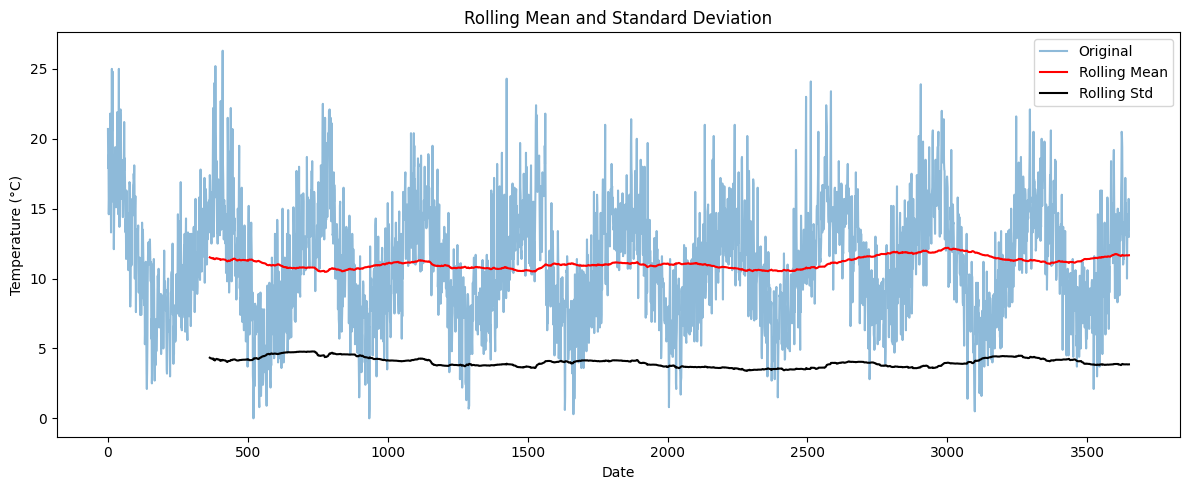

Relatively smooth rolling mean and standard deviation --> apart from seasonality the data is pretty similar in a span of one year


In [6]:
# Rolling mean
rolling_mean = df['min_temp'].rolling(window=365).mean()
rolling_std = df['min_temp'].rolling(window=365).std()

plt.figure(figsize=(12, 5))
plt.plot(df['min_temp'], label='Original', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()
print("Relatively smooth rolling mean and standard deviation --> apart from seasonality the data is pretty similar in a span of one year")

### The non-stationarity in purely seasonal 

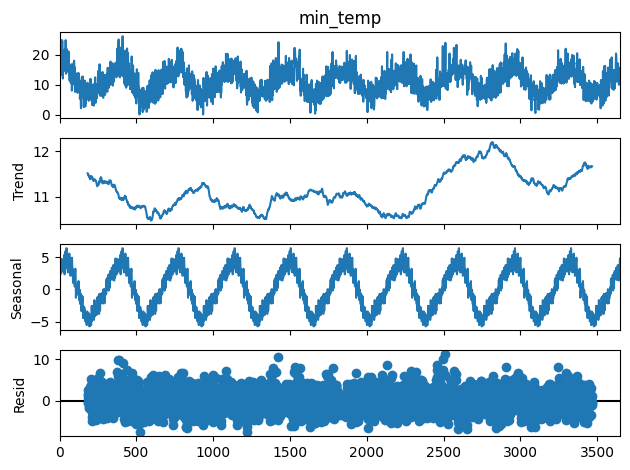

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['min_temp'], model='additive', period=365)
decomposition.plot()
plt.tight_layout()
plt.show()

In [7]:
rolling_mean

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3645    11.651507
3646    11.656712
3647    11.665205
3648    11.668767
3649    11.669589
Name: min_temp, Length: 3650, dtype: float64